# Titanic Analysis: Machine Learning

Import Libraries

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Import Titanic Dataset

In [246]:
data_dir = os.getcwd()
student_file = data_dir + '/TitanicData.csv'
df = pd.read_csv(student_file, index_col=0)
df

,pclass,survived,name,sex,age,siblings/spouses,parents/children,ticket,fare,cabin,embarked,boat,body,home.dest
pid,,,,,,,,,,,,,,
1,3,0,"Abbing, Mr. Anthony",male,42,0,0,C.A. 5547,7.55,NaN,S,NaN,NaN,NaN
2,3,0,"Abbott, Master. Eugene Joseph",male,13,0,2,C.A. 2673,20.25,NaN,S,NaN,NaN,"East Providence, RI"
3,3,0,"Abbott, Mr. Rossmore Edward",male,16,1,1,C.A. 2673,20.25,NaN,S,NaN,190.0,"East Providence, RI"
4,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35,1,1,C.A. 2673,20.25,NaN,S,A,NaN,"East Providence, RI"
5,3,1,"Abelseth, Miss. Karen Marie",female,16,0,0,348125,7.65,NaN,S,16,NaN,"Norway Los Angeles, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0,"Zabour, Miss. Hileni",female,15,1,0,2665,14.45,NaN,C,NaN,328.0,NaN
1306,3,0,"Zabour, Miss. Thamine",female,19,1,0,2665,14.45,NaN,C,NaN,NaN,NaN
1307,3,0,"Zakarian, Mr. Mapriededer",male,27,0,0,2656,7.23,NaN,C,NaN,304.0,NaN


## 1. Data Manipulation

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 14 columns):
pclass              1309 non-null int64
survived            1309 non-null int64
name                1309 non-null object
sex                 1309 non-null object
age                 1309 non-null int64
siblings/spouses    1309 non-null int64
parents/children    1309 non-null int64
ticket              1309 non-null object
fare                1308 non-null float64
cabin               295 non-null object
embarked            1307 non-null object
boat                486 non-null object
body                121 non-null float64
home.dest           745 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 153.4+ KB


### Dropping Columns
Columns to drop: ticket, cabin, boat, body, home.dest

Reasons:
- ticket: cannot convert into integer in a logical way (too many unique values)
- cabin, boat, body: too many NULL values
- home.dest: too many NULL and unique values

In [248]:
df['ticket'].describe()

count         1309
unique         928
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [249]:
df['home.dest'].describe()

count              745
unique             369
top       New York, NY
freq                64
Name: home.dest, dtype: object

In [250]:
df = df.drop(['ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
df

,pclass,survived,name,sex,age,siblings/spouses,parents/children,fare,embarked
pid,,,,,,,,,
1,3,0,"Abbing, Mr. Anthony",male,42,0,0,7.55,S
2,3,0,"Abbott, Master. Eugene Joseph",male,13,0,2,20.25,S
3,3,0,"Abbott, Mr. Rossmore Edward",male,16,1,1,20.25,S
4,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35,1,1,20.25,S
5,3,1,"Abelseth, Miss. Karen Marie",female,16,0,0,7.65,S
...,...,...,...,...,...,...,...,...,...
1305,3,0,"Zabour, Miss. Hileni",female,15,1,0,14.45,C
1306,3,0,"Zabour, Miss. Thamine",female,19,1,0,14.45,C
1307,3,0,"Zakarian, Mr. Mapriededer",male,27,0,0,7.23,C


### Convert Columns Into Integer Data Type
Columns to convert: name, sex, fare, embarked

#### Name Conversion
Strip the title from each record's name column

In [251]:
# Create a series of "dfTitle" by parsing from name column
dfTitle = [i.split(",")[1].split(".")[0].strip() for i in df["name"]] 
df["title"] = pd.Series(dfTitle)

df["title"].value_counts()

Mr              756
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
the Countess      1
Lady              1
Mme               1
Don               1
Dona              1
Sir               1
Capt              1
Jonkheer          1
Name: title, dtype: int64

Replace "Ms" to "Miss" and uncommon titles into "Other" in new title column. Note: "Zimmerman, Mr. Leo" has null title for some reason

In [252]:
# "Zimmerman, Mr. Leo" has null title for some reason
df["title"].fillna("Mr", inplace=True)

In [253]:
df["title"] = df["title"].replace(['Ms'], 'Miss') 
df["title"] = df["title"].replace(['Rev', 'Dr', 'Col', 'Major', 'Mlle', 'Capt', 'Lady',  'Jonkheer', 'Dona', 'Sir', 
                                   'the Countess', 'Don', 'Mme'], 'Other')

#df.sort_values(by=['title'])

In [254]:
df["title"].value_counts()

Mr        757
Miss      262
Mrs       197
Master     61
Other      32
Name: title, dtype: int64

ID each name by given title. Most common titles are Mr., Mrs., Miss, and Master. "Mr" = 1, "Mrs" = 2, "Miss" = 3 "Master" = 4, "Other" = 5

In [255]:
data = [df] # Convert into a list, so it can be looped through easily
assign = {"Mr": 1, "Mrs": 2, "Miss": 3, "Master": 4, "Other": 5}

for d in data:
    df['title'] = d['title'].map(assign) # Map title column by assign dictionary

In [256]:
df["title"].value_counts()

1    757
3    262
2    197
4     61
5     32
Name: title, dtype: int64

#### Sex Conversion

In [257]:
df["sex"].value_counts()

male      843
female    466
Name: sex, dtype: int64

ID each sex by integer. 'male' = 1, 'female' = 2

In [258]:
data = [df] # Convert into a list, so it can be looped through easily
assign = {"male": 1, "female": 2}

for d in data:
    df['sex'] = d['sex'].map(assign) # Map sex column by assign dictionary
    
# df

In [259]:
df["sex"].value_counts()

1    843
2    466
Name: sex, dtype: int64

#### Fare Conversion
Convert float to int

In [260]:
df['fare'].describe()

count    1308.000000
mean       33.296261
std        51.758691
min         0.000000
25%         7.900000
50%        14.450000
75%        31.280000
max       512.330000
Name: fare, dtype: float64

In [261]:
data = [df]

for d in data:
    df['fare'] = d['fare'].fillna(0)
    df['fare'] = d['fare'].astype(int)

In [262]:
df['fare'].describe()

count    1309.000000
mean       32.844156
std        51.755218
min         0.000000
25%         7.000000
50%        14.000000
75%        31.000000
max       512.000000
Name: fare, dtype: float64

#### Embarked Conversion

In [263]:
df["embarked"].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

Fill the 2 null values with 'S' because it is the most common

In [264]:
df["embarked"].fillna("S", inplace=True)
#df.sort_values(by=['embarked'])

ID each port of embarkment by integer. 'S' = 1, 'C' = 2, 'Q' = 3

In [265]:
data = [df] # Convert into a list, so it can be looped through easily
assign = {"S": 1, "C": 2, "Q": 3}

for d in data:
    df['embarked'] = d['embarked'].map(assign) # Map embarked column by assign dictionary

In [266]:
df["embarked"].value_counts()

1    916
2    270
3    123
Name: embarked, dtype: int64

### Grouping Columns
Columns to group: Age and Fare<br>
Note: Attempted to group proportionally

#### Age Grouping
Group age column by range. 0-10 = 0, 11-20 = 1, 21-25 = 2, 26-30 = 3, 31-40 = 4, 41-50 = 5, 51-80 = 6

In [267]:
df['agerange'] = pd.cut(df['age'], bins=[-1, 10, 20, 25, 30, 40, 50, 80], labels=False)
#df['agerange'] = pd.cut(df['age'], bins=[-1, 30, 40, 50, 80], labels=False)
df['agerange'].value_counts()

4    257
2    250
3    219
1    213
5    165
6    105
0    100
Name: agerange, dtype: int64

#### Fare Grouping
Group fare by range. 0-7 = 0, 8-10 = 1, 11-15 = 2, 16-25 = 3, 26-35 = 4, 36-512 = 5

In [268]:
df['fare'].describe()

count    1309.000000
mean       32.844156
std        51.755218
min         0.000000
25%         7.000000
50%        14.000000
75%        31.000000
max       512.000000
Name: fare, dtype: float64

In [269]:
df['farerange'] = pd.cut(df['fare'], bins=[-1, 7, 10, 15, 25, 35, 512], labels=False)
#df['farerange'] = pd.cut(df['fare'], bins=[-1, 25, 35, 512], labels=False)
df['farerange'].value_counts()

0    361
5    291
4    185
2    183
1    171
3    118
Name: farerange, dtype: int64

## 2. Splitting Dataset into train and test

Drop name, age, and fare columns

In [270]:
df = df.drop(['name', 'age', 'fare'], axis=1)
#df = df.drop(['name', 'age', 'fare', 'title', 'siblings/spouses', 'parents/children', 'embarked', 'agerange', 'farerange'], axis=1)

Split dataset randomly (test = 75% of records (982), trainAnswers/train = 25% (327))

In [271]:
test = df.sample(frac=0.75, random_state=420)
trainAnswers = df.drop(test.index) # test is all the other columns in dataset not in train

In [285]:
test = test.sort_values(by=['pid'])
test['sex'].value_counts()

1    625
2    357
Name: sex, dtype: int64

In [273]:
trainAnswers = trainAnswers.sort_values(by=['pid'])
trainAnswers

,pclass,survived,sex,siblings/spouses,parents/children,embarked,title,agerange,farerange
pid,,,,,,,,,
3,3,0,1,1,1,1,2,1,3
4,3,1,2,1,1,1,3,4,3
6,3,1,1,0,0,1,1,2,0
7,2,0,1,1,0,2,2,3,3
10,3,1,2,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...
1284,1,0,1,0,0,1,1,5,4
1294,3,0,1,0,0,1,1,4,1
1296,2,1,2,0,0,1,1,3,2


Drop target column "survived" from testAnswers to create test set

In [274]:
train = trainAnswers.drop(['survived'], axis=1)

In [275]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 1 to 1309
Data columns (total 9 columns):
pclass              982 non-null int64
survived            982 non-null int64
sex                 982 non-null int64
siblings/spouses    982 non-null int64
parents/children    982 non-null int64
embarked            982 non-null int64
title               982 non-null int64
agerange            982 non-null int64
farerange           982 non-null int64
dtypes: int64(9)
memory usage: 76.7 KB


In [276]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 3 to 1305
Data columns (total 8 columns):
pclass              327 non-null int64
sex                 327 non-null int64
siblings/spouses    327 non-null int64
parents/children    327 non-null int64
embarked            327 non-null int64
title               327 non-null int64
agerange            327 non-null int64
farerange           327 non-null int64
dtypes: int64(8)
memory usage: 23.0 KB


## 3. Training Supervised Models

Create datasets for model testing

In [277]:
X_train = train.copy()
Y_train = trainAnswers["survived"].copy()
X_test  = test.drop(['survived'], axis=1)

In [278]:
X_test

,pclass,sex,siblings/spouses,parents/children,embarked,title,agerange,farerange
pid,,,,,,,,
1,3,1,0,0,1,4,5,0
2,3,1,0,2,1,1,1,3
5,3,2,0,0,1,1,1,0
8,2,2,1,0,2,1,3,3
9,3,1,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...
1303,3,1,0,0,2,3,3,2
1306,3,2,1,0,2,1,1,2
1307,3,1,0,0,2,1,3,0


In [279]:
X_train

,pclass,sex,siblings/spouses,parents/children,embarked,title,agerange,farerange
pid,,,,,,,,
3,3,1,1,1,1,2,1,3
4,3,2,1,1,1,3,4,3
6,3,1,0,0,1,1,2,0
7,2,1,1,0,2,2,3,3
10,3,2,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...
1284,1,1,0,0,1,1,5,4
1294,3,1,0,0,1,1,4,1
1296,2,2,0,0,1,1,3,2


#### Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [280]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

#### Stochastic Gradient Descent
https://scikit-learn.org/stable/modules/sgd.html

In [281]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

#### Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [282]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

C:\Users\winie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Decision Tree
https://scikit-learn.org/stable/modules/tree.html

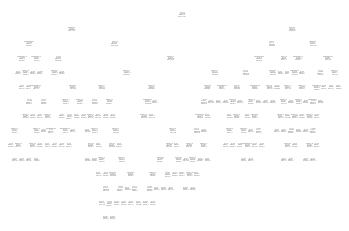

In [283]:
# Make an instance of the Model
decision_tree = DecisionTreeClassifier() 

# Train the model on the data
decision_tree.fit(X_train, Y_train)  

# Predict labels of unseen (test) data (survived column)
Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

fn=['pclass','sex','siblings/spouses',' parents/children', 'embarked', 'title', 'agerange', 'farerange']
tree.plot_tree(decision_tree, feature_names = fn);

#### Results

In [284]:
results = pd.DataFrame({
    'Model': ['Random Forest','Stochastic Gradient Decent', 'Logistic Regression', 'Decision Tree'],
    'Score': [acc_random_forest, acc_sgd, acc_log, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
94.80,Random Forest
94.80,Decision Tree
78.29,Logistic Regression
74.62,Stochastic Gradient Decent
